# CMSE 802 In-class assignment: Fast Fourier Transform (FFT)
## Date: 10/23/2018
## Due: 10/23/2018; 10:30 PM

## The goal of this assignment is to do some practice on the application of FFT.

<img src="http://groups.csail.mit.edu/netmit/wordpress/wp-content/themes/netmit/images/sFFT.png"><a href="http://groups.csail.mit.edu/netmit/wordpress/projects/sparse-fourier-transform/"><p style="text-align: right;">
Image from http://groups.csail.mit.edu/netmit
</p></a>


---
### Your name: Boyao Zhu
    

-----
### 1. NOAA Temperature Example
We will use some of the extensive datasets available at the National Oceanic and Atmospheric Administration (NOAA). 
<a href="http://www.noaa.gov/"><img width=100 align='right' src="http://www.nssl.noaa.gov/projects/debrisflow09/NOAA%20Circle.gif"></a>

### Download the data
We are going to use a web scrapper (modified from the scraper we used in WebCrawler).  Download the **noaa_scraper.py** file from the class D2L site. 

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt

from noaa_scraper import get_noaa_temperatures

** Question 1:** With your group, do a code review of the contents of the **noaa_scraper.py** file and figure out what it does. What are the main part of this module and what do they do?

** your answer: ** The main purpose of this code is to get the NOAA air temperature from a given website

** Question 2:** Please run the cell below and describe the steps that the function **get_noaa_temperatures** follows.

** your answer: ** The function 'get_noaa_temperatures'  calls the web crawler, and the crawler visits the NOAA website and gets all of the data files.  The function "get_airtemperature_from_files" opens all files and reads the data with the function 'read_data_column'.  And it returns an array of air temperatures.

FloatProgress(value=0.0)

FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2007/CRNS0101-05-2007-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS0101-05-2007-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2008/CRNS0101-05-2008-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS0101-05-2008-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2009/CRNS0101-05-2009-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS0101-05-2009-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2010/CRNS0101-05-2010-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS0101-05-2010-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2011/CRNS0101-05-2011-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS0101-05-2011-MI_Gaylord_9_SSW.txt
FOUND  http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/2012/CRNS0101-05-2012-MI_Gaylord_9_SSW.txt
file exists... ./data/CRNS01

FloatProgress(value=0.0, max=12.0)

reading... ./data/CRNS0101-05-2007-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2008-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2009-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2010-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2011-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2012-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2013-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2014-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2015-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2016-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2017-MI_Gaylord_9_SSW.txt
reading... ./data/CRNS0101-05-2018-MI_Gaylord_9_SSW.txt


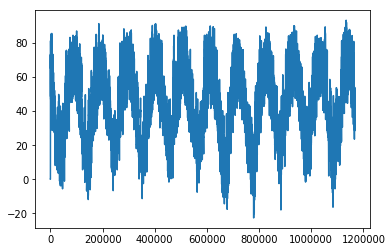

In [2]:
air_temperatures = get_noaa_temperatures('http://www1.ncdc.noaa.gov/pub/data/uscrn/products/subhourly01/', 'Gaylord', 100)
plt.plot(air_temperatures)


**Question 3:** What is the time period over which the data was sampled?

** your answer: ** 2007 to 2018

**Question 4:** What is the sampling rate (how often) the data taken? 

** your answer: ** 5 minutes

**Question 5:**  Describe the the periodic nature of the signal. Can you think of natural factors that would cause this periodicity?

** your answer: ** the peaks reflect the seasonal temperature cycles.

---
### 2. FFT of the NOAA data

**Task 1:** Using what we learned in the pre-class assignment, calculate the Fast Fourier Transform of the (NOAA) surface temperature data and display it in the frequency domain. Remember that the frequency domain is symmetric so go ahead and just display the first half. 

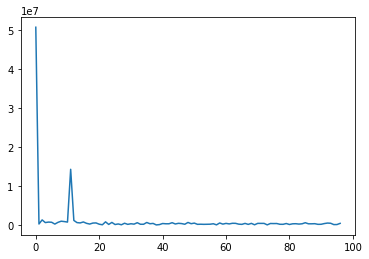

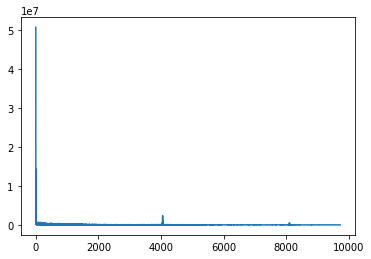

In [39]:
# your code here:
import numpy as np
PyFs = np.fft.fft(air_temperatures)
plt.figure()
plt.plot(abs(PyFs[:int(len(air_temperatures)/12000)]))
plt.figure()
plt.plot(abs(PyFs[:int(len(air_temperatures)/120)]))

**Question 6:**  As a group, discuss the above graph. Is it what you expected?  Can you tell where the largest frequencies contributing to the signal are? 

** your answer: ** I did expect peaks for the annual and daily temperature cycles, but i didn't realized they would be so hard to find.

**Task 2:**
As a group, write some code to calculate the five largest frequencies in the frequency space (make sure you ignore symmetry). 

HINT:  Try using the numpy argsort function.  Google it if you need to. 

In [40]:
# your code here:
a = np.argsort(PyFs[:int(len(air_temperatures)/2)])

print (a[-1])
print (a[-2])
print (a[-3])
print (a[-4])
print (a[-5])


print (PyFs[a[-1]])
print (PyFs[a[-2]])
print (PyFs[a[-3]])
print (PyFs[a[-4]])
print (PyFs[a[-5]])


0
11
4052
8
5
(50637886.08+0j)
(4122160.570624949+13654937.045526547j)
(1623252.74067713-1715060.3899250054j)
(756413.1054759554+608683.9715534896j)
(690170.4475172095-127173.87486300405j)


**Question 7:** Why is there a spike around 10 in this data? What happened 10 times?

** your answer: ** because the frequency '10' contribute dominantly in air temperature

**Question 8:** Why is there a spike of over 3000 in this data? What happened ~ 3000 times?

** your answer: ** same answer as in question 7.

---
### Denoising in the Frequency domain

**Task 3:** As a group, modify the frequency space to remove the smallest frequencies impact the signal.  Try zeroing out those other than the 10 biggest contributions. 

HINT: You don't need to write loops (although you can). Remember you can assign a group if indexes in a numpy array: See the following example:

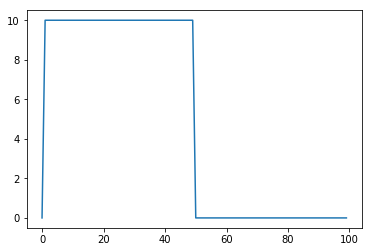

In [18]:
#Example numpy range assignment
example = np.zeros(100)
example[1:50] = 10
plt.plot(example)

In [36]:
# your code here:
a_smallest = a[:-10]
PyFs[a_smallest] = 0
print (PyFs[:10])

[50637886.08           +0.j                0.             +0.j
        0.             +0.j                0.             +0.j
   622278.67356539+411728.23279394j   690170.44751721-127173.874863j
        0.             +0.j                0.             +0.j
   756413.10547596+608683.97155349j        0.             +0.j        ]


**Task 4:** Do an "inverse Fourier Transform" to the cleaned up data.  Plot the resulting data in the time domain.

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


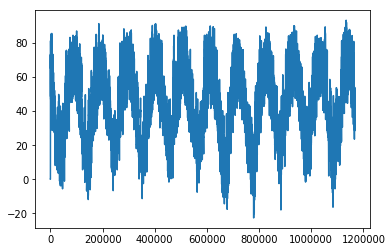

In [41]:
# your code here:

yy = np.fft.ifft(PyFs)
plt.plot(yy)

### Congratulations, we're done!

** Don't forget to add your names to the top!!**

Log into the course D2L website (d2l.msu.edu) and go to "Assessments > Assignments > In-class Assignment 20181023".